In [1]:
getwd()
set.seed(123)
setwd("/liulab/galib/dlbcl_manuscript/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)
library(cluster)
source("./scripts/scplot.R")

[1] "/liulab/galib/dlbcl_manuscript/scripts"

Warning message:
“package ‘rBCS’ was built under R version 4.1.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘harmony’ was built under R version 4.1.3”
Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.2”
Loading required package: viridisLite

Warning message:
“pack

[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.1.3”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: usethis

Warning message:
“package ‘presto’ was built under R version 4.1.3”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

In [2]:
B_cell<- readRDS("./data/objects/B_cell_final.rds")

In [3]:
legend_dot_size = unit(2,"mm")

lgd = Legend(labels = c(0, 10, 25, 50, 75, 100),
           title = "percentage",
           type = "points",
        graphics = list(
    function(x, y, w, h) grid.circle(x, y, r= sqrt(0/100) * legend_dot_size,
                                    gp = gpar(fill = "black")),
    function(x, y, w, h) grid.circle(x, y, r= sqrt(10/100) * legend_dot_size,
                                    gp = gpar(fill = "black")),
    function(x, y, w, h) grid.circle(x, y, r= sqrt(25/100) * legend_dot_size,
                                    gp = gpar(fill = "black")),
    function(x, y, w, h) grid.circle(x, y, r= sqrt(50/100) * legend_dot_size,
                                    gp = gpar(fill = "black")),
    function(x, y, w, h) grid.circle(x, y, r= sqrt(75/100) * legend_dot_size,
                                    gp = gpar(fill = "black")),
    function(x, y, w, h) grid.circle(x, y, r= sqrt(100/100) * legend_dot_size,
                                    gp = gpar(fill = "black"))            
            )
     )

## B_cell space

In [4]:
B_cell_genes<- read_tsv("./data/B_cell_genes_to_plot.tsv", col_names = FALSE)  %>% 
    pull(X1)

B_cell_genes<- str_to_title(B_cell_genes)
B_cell_genes<- B_cell_genes  %>% gsub(pattern = "Aw", replacement = "AW")
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'C130026l21rik', replacement = 'C130026L21Rik')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'D10wsu102e', replacement = 'D10Wsu102e')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Ighg2', replacement = 'Ighg2b')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Cd21', replacement = 'Cr2')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Ac133103.1', replacement = 'Sp140')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Tubb', replacement = 'Tubb5')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Igkv 16-104', replacement = 'Igkv16-104')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Ighv 1-52', replacement = 'Ighv1-52')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Ighv 1-52', replacement = 'Ighv1-52')
B_cell_genes<- B_cell_genes  %>% gsub(pattern = 'Pdcd2l2', replacement = 'Pdcd2l')

B_cell_genes[!B_cell_genes %in% rownames(B_cell)]

B_cell_genes<- B_cell_genes  %>% unique()

B_cell_col<- B_cell@meta.data  %>% select(new_annotation, HEX_code)  %>% distinct()
cluster_id<- B_cell@meta.data  %>% arrange(seurat_clusters)  %>% distinct(new_annotation)  %>% pull(new_annotation)
B_cell_colors<- B_cell@meta.data  %>% arrange(seurat_clusters)  %>% distinct(HEX_code)  %>% pull(HEX_code)
names(B_cell_colors)<- cluster_id

Rows: 105 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


character(0)

### All samples

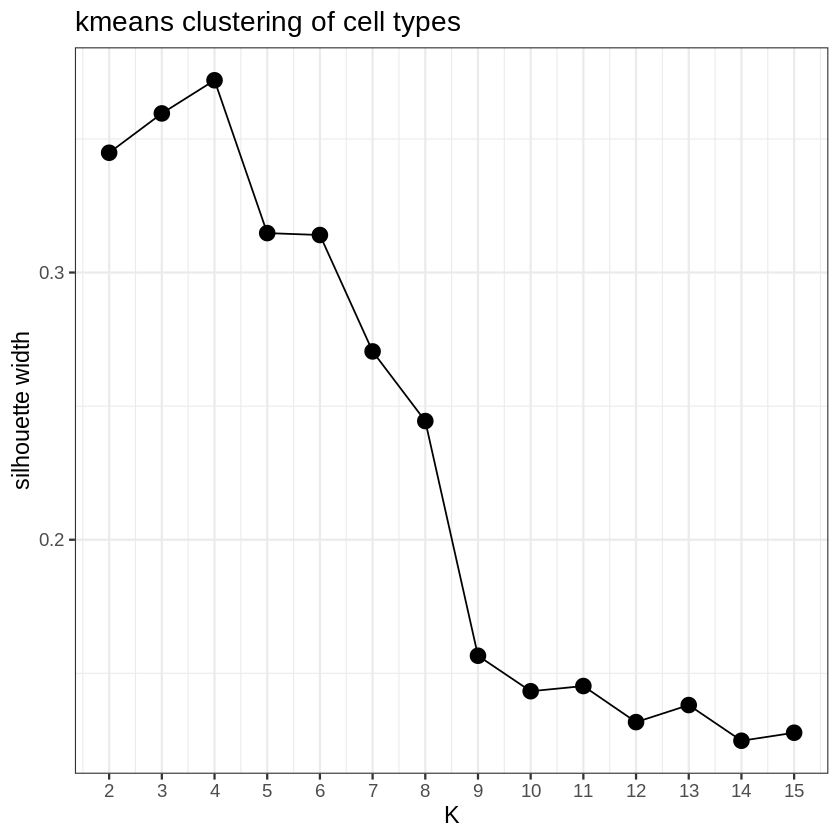

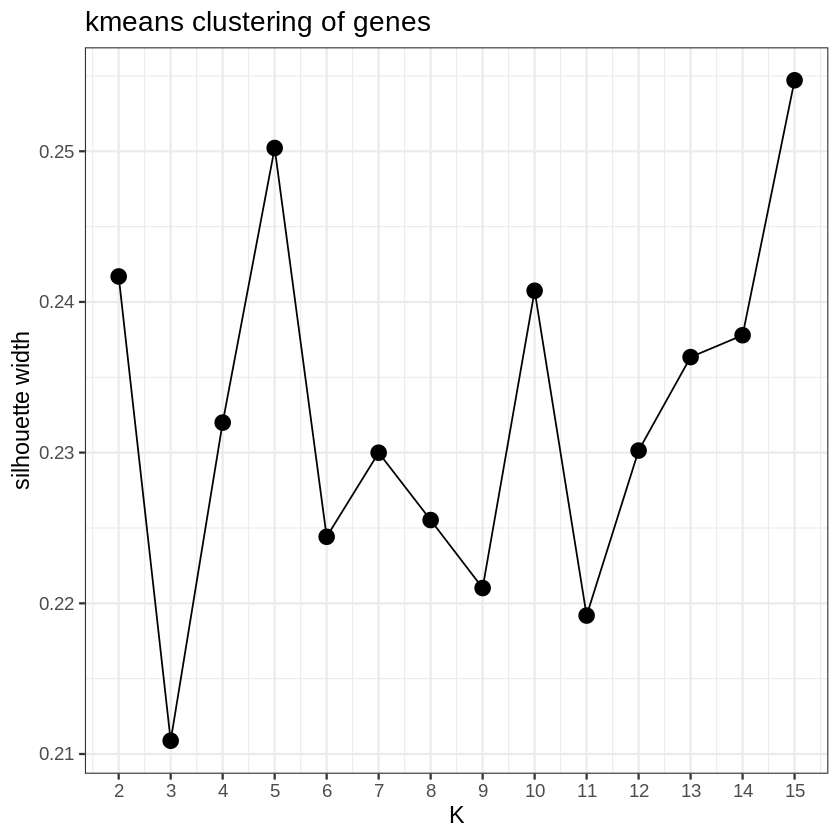

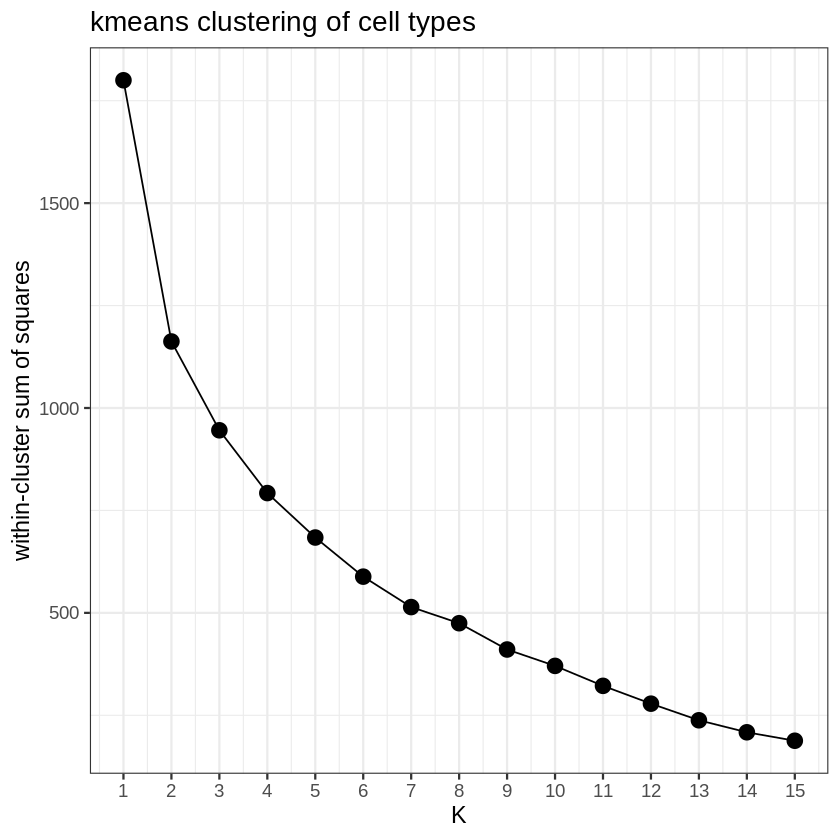

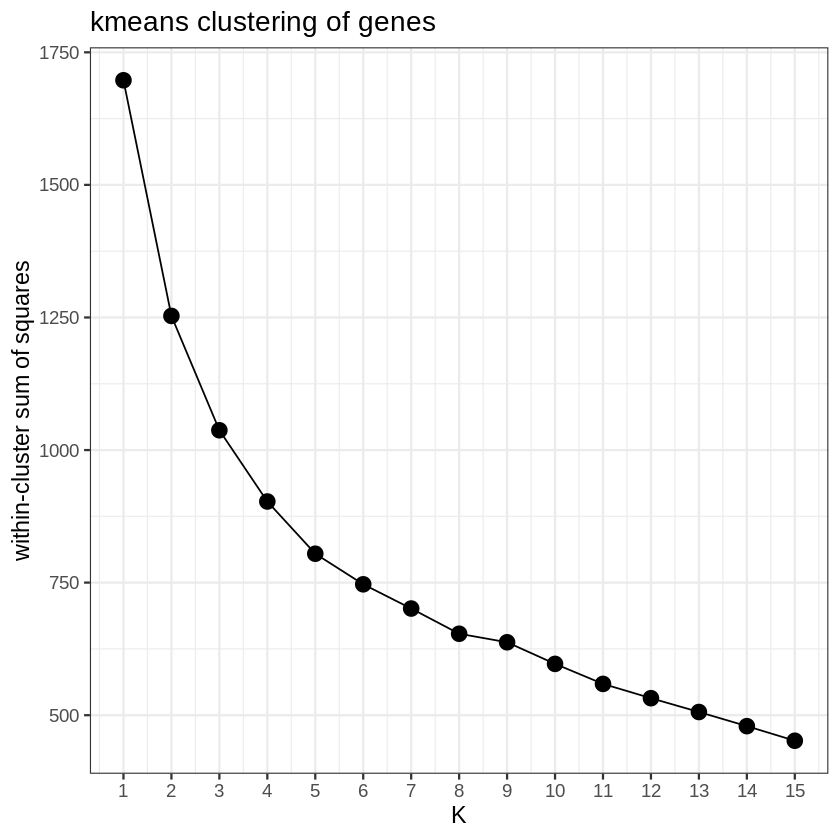

In [5]:
B_cell_mtx<- GetMatrixFromSeurat(B_cell, B_cell_genes, group = "new_annotation")

# Compute k-means clustering with different values of k and visualize
set.seed(123)
silhouette_scores <- numeric(15)
k_values = 2:15

for (k in k_values) {
  km <- kmeans(t(B_cell_mtx$exp_mat), centers = k, nstart = 10)
  ss <- silhouette(km$cluster, dist(t(B_cell_mtx$exp_mat)))
  silhouette_scores[k] <- mean(ss[, 3])
}

df<- data.frame(k = k_values, ss_width = silhouette_scores[c(2:15)])

df %>%
    ggplot(aes(x = k, y = ss_width)) +
    geom_line() +
    geom_point(size = 4) +
#     geom_point(aes(7, df[6,'ss_width']), size = 8, shape = 21, color='deeppink3', fill=NA) +
    theme_bw(base_size = 14) +
    scale_x_continuous(breaks = k_values) +
    labs(x = 'K', y='silhouette width', title = 'kmeans clustering of cell types')

ggsave("results/figures/5_B_cell_kmeans_celltypes_sil_width.pdf", width = 4, height = 3)

silhouette_scores <- numeric(15)
k_values = 2:15

for (k in k_values) {
  km <- kmeans(B_cell_mtx$exp_mat, centers = k, nstart = 10)
  ss <- silhouette(km$cluster, dist(B_cell_mtx$exp_mat))
  silhouette_scores[k] <- mean(ss[, 3])
}

df<- data.frame(k = k_values, ss_width = silhouette_scores[c(2:15)])

df %>%
    ggplot(aes(x = k, y = ss_width)) +
    geom_line() +
    geom_point(size = 4) +
#     geom_point(aes(7, df[5,'ss_width']), size = 8, shape = 21, color='deeppink3', fill=NA) +
    theme_bw(base_size = 14) +
    scale_x_continuous(breaks = k_values) +
    labs(x = 'K', y='silhouette width', title = 'kmeans clustering of genes')

ggsave("results/figures/5_B_cell_kmeans_genes_sil_width.pdf", width = 4, height = 3)

wss <- function(k) {
    kmeans(x = t(B_cell_mtx$exp_mat), centers = k, nstart = 10)$tot.withinss
}

k_values <- 1:15
wss_values <- sapply(k_values, wss)

df<- data.frame(k = k_values, wss = wss_values)
df %>%
    ggplot(aes(x = k, y = wss)) +
    geom_line() +
    geom_point(size = 4) +
#     geom_point(aes(6, df[6,'wss']), size = 8, shape = 21, color='deeppink3', fill=NA) +
    theme_bw(base_size = 14) +
    scale_x_continuous(breaks = 1:15) +
    labs(x = 'K', y='within-cluster sum of squares', title = 'kmeans clustering of cell types')
ggsave("results/figures/5_B_cell_kmeans_celltypes_elbow.pdf", width = 4, height = 3)

wss <- function(k) {
    kmeans(x = B_cell_mtx$exp_mat, centers = k, nstart = 10)$tot.withinss
}

k_values <- 1:15
wss_values <- sapply(k_values, wss)

df<- data.frame(k = k_values, wss = wss_values)
df %>%
    ggplot(aes(x = k, y = wss)) +
    geom_line() +
    geom_point(size = 4) +
#     geom_point(aes(6, df[6,'wss']), size = 8, shape = 21, color='deeppink3', fill=NA) +
    theme_bw(base_size = 14) +
    scale_x_continuous(breaks = 1:15) +
    labs(x = 'K', y='within-cluster sum of squares', title = 'kmeans clustering of genes')

ggsave("results/figures/5_B_cell_kmeans_genes_elbow.pdf", width = 4, height = 3)

In [6]:
B_cell_mtx<- GetMatrixFromSeurat(B_cell, B_cell_genes, group = "new_annotation")

B_cell_col<- B_cell@meta.data  %>% select(new_annotation, HEX_code)  %>% distinct()
cluster_id<- B_cell@meta.data  %>% arrange(seurat_clusters)  %>% distinct(new_annotation)  %>% pull(new_annotation)
B_cell_colors<- B_cell@meta.data  %>% arrange(seurat_clusters)  %>% distinct(HEX_code)  %>% pull(HEX_code)
names(B_cell_colors)<- cluster_id

column_ha <- HeatmapAnnotation(foo = anno_text(gsub("_.*", "", cluster_id), location = 0.5, just = "center", 
                    gp = gpar(fill = setNames(B_cell_colors, gsub("_.*", "", cluster_id)), 
                              col = "white", border = NA)), show_annotation_name = FALSE, show_legend = FALSE)

col_fun = circlize::colorRamp2(c(-2,0,2), viridis::viridis(3))

p_main<- MakeClusterDotPlot(exp_mat = B_cell_mtx$exp_mat, 
                       percent_mat = B_cell_mtx$percent_mat,
                       cluster_id = cluster_id,
                       column_ha = column_ha, 
                       col_fun = col_fun,
                       column_title_side = "bottom",
                       column_title = "B cell Space", 
                       column_km = 4,
                       row_km = 5,
                       row_names_font_size = 8, 
                       legend_dot_size = unit(2, "mm"),
                       column_names_side = "top",
                       show_column_dend = FALSE,
                       show_row_dend = FALSE, 
                       cluster_columns = TRUE,
                       cluster_rows = TRUE)

pdf("results/figures/5_B_cell_dotplot_final_annotation_bidirectional_clustering_new.pdf", width = 7, height = 16)
set.seed(123)
ht = draw(p_main, annotation_legend_list = lgd)

dev.off()

cluster_id[column_order(ht)  %>%  unlist(use.names = FALSE)]

png 
  2

[1] 16_Other                     1_Marginal Zone             
 [3] 27_Light Zone                14_Follicular Serpina3+     
 [5] 10_Follicular IFN-stimulated 25_Ig-restricted            
 [7] 17_Ig-restricted             23_Ig-restricted            
 [9] 11_Follicular                9_Follicular Hspa1+         
[11] 6_Follicular                 13_Follicular               
[13] 12_Follicular                20_Ig-restricted            
[15] 24_Follicular                0_Follicular                
[17] 2_Transitional (T2)          7_Age-associated/autoimmune 
[19] 8_Age-associated/autoimmune  5_Atypical Marginal Zone    
[21] 4_Atypical CD21-CD23-        15_Plasmablasts             
[23] 22_Pre-plasmablasts          18_Cycling MHCII low        
[25] 21_Cycling MHCII low         19_Cycling MHCII low        
[27] 3_Atypical CD21lowCD23low   
27 Levels: 0_Follicular 1_Marginal Zone ... 27_Light Zone

In [7]:
cluster_id = cluster_id[column_order(ht)  %>%  unlist(use.names = FALSE)]
cluster_id = factor(cluster_id, levels = cluster_id)
B_cell_genes = B_cell_genes[row_order(ht)  %>%  unlist(use.names = FALSE)]
B_cell_colors = B_cell_colors[cluster_id]
B_cell$new_annotation<- factor(B_cell$new_annotation, levels = cluster_id)

### Dotplot by genotype

In [169]:
WT_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "WT"))
cd70_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "CD70-/-"))
single_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "Bcl6tg/+"))
double_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "CD70-/-;Bcl6tg/+"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes,
                                          group = "new_annotation")

B_cell_mtx_WT<- GetMatrixFromSeurat2(B_cell[,WT_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_cd70<- GetMatrixFromSeurat2(B_cell[,cd70_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_single<- GetMatrixFromSeurat2(B_cell[,single_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_double<- GetMatrixFromSeurat2(B_cell[,double_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_WT$exp_mat, B_cell_mtx_cd70$exp_mat, 
                                 B_cell_mtx_single$exp_mat, B_cell_mtx_double$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)

ncol(B_cell_combined_scaled)

B_cell_mtx_WT_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_cd70_scaled<-  B_cell_combined_scaled[, 28:54]
B_cell_mtx_single_scaled<-  B_cell_combined_scaled[, 55:81]
B_cell_mtx_double_scaled<-  B_cell_combined_scaled[, 82:108]

colnames(B_cell_mtx_WT_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_cd70_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_single_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_double_scaled)<- colnames(B_cell_mtx$exp_mat)

column_ha <- HeatmapAnnotation(foo = anno_text(gsub("_.*", "", cluster_id), 
                                               location = 0.5, just = "center", 
                                               gp = gpar(fill = setNames(B_cell_colors, 
                                                                         gsub("_.*", "", cluster_id)), 
                                                         col = "white", border = NA)), 
                               show_annotation_name = FALSE, show_legend = FALSE)

col_fun = circlize::colorRamp2(c(-2,0,2), viridis::viridis(3))

[1] 27
[1] 27
[1] 27
[1] 27
[1] 27


[1] 108

In [171]:
row_split = factor(rep(names(row_order(ht)), lengths(row_order(ht))), levels = names(row_order(ht)))
col_split = factor(rep(names(column_order(ht)), lengths(column_order(ht))), levels = names(column_order(ht)))
pdf("./results/figures/5_B_cell_dotplot_final_annotation_by_genotype.pdf", width = 28, height = 16)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_WT_scaled, 
               percent_mat = B_cell_mtx_WT$percent_mat, 
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "WT",
               column_title_side = "bottom",
               column_split = col_split,
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows = FALSE,
               cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_cd70_scaled, 
               percent_mat = B_cell_mtx_cd70$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "CD70-/-",
               column_title_side = "bottom",
               column_split = col_split,
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_single_scaled, 
               percent_mat = B_cell_mtx_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "Bcl6tg/+",
               column_title_side = "bottom",
               column_split = col_split,
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_double_scaled, 
               percent_mat = B_cell_mtx_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",
               column_split = col_split, 
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

draw(hp1 + hp2 + hp3 + hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )

dev.off()

png 
  2

### Dotplot by age

In [172]:
n_6mos_cells<- rownames(B_cell@meta.data  %>% filter(age == "6mos"))
n_14mos_cells<- rownames(B_cell@meta.data  %>% filter(age == "14mos"))
n_18mos_cells<- rownames(B_cell@meta.data  %>% filter(age == "18mos"))
sick_cells<- rownames(B_cell@meta.data  %>% filter(age == "sick"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_6mos<- GetMatrixFromSeurat2(B_cell[,n_6mos_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_14mos<- GetMatrixFromSeurat2(B_cell[,n_14mos_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_18mos<- GetMatrixFromSeurat2(B_cell[,n_18mos_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_sick<- GetMatrixFromSeurat2(B_cell[,sick_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_6mos$exp_mat, B_cell_mtx_14mos$exp_mat, 
                                 B_cell_mtx_18mos$exp_mat, B_cell_mtx_sick$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)


ncol(B_cell_combined_scaled)
B_cell_mtx_6mos_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_14mos_scaled<-  B_cell_combined_scaled[, 28:54]
B_cell_mtx_18mos_scaled<-  B_cell_combined_scaled[, 55:81]
B_cell_mtx_sick_scaled<-  B_cell_combined_scaled[, 82:108]

colnames(B_cell_mtx_6mos_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_14mos_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_18mos_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_sick_scaled)<- colnames(B_cell_mtx$exp_mat)


B_cell_mtx_WT_scaled=B_cell_mtx_WT_scaled[,cluster_id]
B_cell_mtx_WT$percent_mat = B_cell_mtx_WT$percent_mat[, cluster_id]

column_ha <- HeatmapAnnotation(foo = anno_text(gsub("_.*", "", cluster_id), 
                                               location = 0.5, just = "center", 
                                               gp = gpar(fill = setNames(B_cell_colors, 
                                                                         gsub("_.*", "", cluster_id)), 
                                                         col = "white", border = NA)), 
                               show_annotation_name = FALSE, show_legend = FALSE)

col_fun = circlize::colorRamp2(c(-2,0,2), viridis::viridis(3))

[1] 27
[1] 27
[1] 27
[1] 27
[1] 27


[1] 108

In [174]:
row_split = factor(rep(names(row_order(ht)), lengths(row_order(ht))), levels = names(row_order(ht)))
col_split = factor(rep(names(column_order(ht)), lengths(column_order(ht))), levels = names(column_order(ht)))
pdf("./results/figures/5_B_cell_dotplot_final_annotation_by_age.pdf", width = 28, height = 16)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_6mos_scaled, 
           percent_mat = B_cell_mtx_6mos$percent_mat,
           col_fun = col_fun, cluster_id = cluster_id,
           column_title = "6mos",
           column_title_side = "bottom",
           column_split = col_split,
           row_split = row_split,
           row_names_font_size = 8, 
           column_ha = column_ha,
           legend_dot_size = unit(2, "mm"),
           show_row_dend =FALSE,
           show_column_dend = FALSE,
           column_names_side = "top", cluster_rows=FALSE, cluster_columns=FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_14mos_scaled, 
               percent_mat = B_cell_mtx_14mos$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "14mos",
               column_title_side = "bottom",
               column_split = col_split,
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns=FALSE)

hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_18mos_scaled, 
               percent_mat = B_cell_mtx_18mos$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "18mos",
               column_title_side = "bottom",
               column_split = col_split, 
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top",  cluster_rows=FALSE, cluster_columns=FALSE)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_sick_scaled, 
               percent_mat = B_cell_mtx_sick$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "sick",
               column_title_side = "bottom",
               column_split = col_split,         
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top",  cluster_rows=FALSE, cluster_columns=FALSE)

draw(hp1 + hp2 + hp3 + hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

png 
  2

### By age and genotype 14 class

- 6mos (WT, CD70-/-, Bcl6tg/+, CD70-/-;Bcl6tg/+)

In [175]:
n_6mos_WT_cells<- rownames(B_cell@meta.data  %>% filter(age == "6mos", genotype == "WT"))
n_6mos_cd70_cells<- rownames(B_cell@meta.data  %>% filter(age == "6mos", genotype == "CD70-/-"))
n_6mos_single_cells<- rownames(B_cell@meta.data  %>% filter(age == "6mos", genotype == "Bcl6tg/+"))
n_6mos_double_cells<- rownames(B_cell@meta.data  %>% filter(age == "6mos", genotype == "CD70-/-;Bcl6tg/+"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_6mos_WT<- GetMatrixFromSeurat2(B_cell[,n_6mos_WT_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_6mos_cd70<- GetMatrixFromSeurat2(B_cell[,n_6mos_cd70_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_6mos_single<- GetMatrixFromSeurat2(B_cell[,n_6mos_single_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_6mos_double<- GetMatrixFromSeurat2(B_cell[,n_6mos_double_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_6mos_WT$exp_mat,
                        B_cell_mtx_6mos_cd70$exp_mat,
                        B_cell_mtx_6mos_single$exp_mat,
                        B_cell_mtx_6mos_double$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)


ncol(B_cell_combined_scaled)
B_cell_mtx_6mos_WT_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_6mos_cd70_scaled<-  B_cell_combined_scaled[, 28:54]
B_cell_mtx_6mos_single_scaled<-  B_cell_combined_scaled[, 55:81]
B_cell_mtx_6mos_double_scaled<-  B_cell_combined_scaled[, 82:108]

colnames(B_cell_mtx_6mos_WT_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_6mos_cd70_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_6mos_single_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_6mos_double_scaled)<- colnames(B_cell_mtx$exp_mat)


row_split = factor(rep(names(row_order(ht)), lengths(row_order(ht))), levels = names(row_order(ht)))
col_split = factor(rep(names(column_order(ht)), lengths(column_order(ht))), levels = names(column_order(ht)))


pdf("./results/figures/5_B_cell_dotplot_final_annotation_6mos_by_genotype.pdf", width = 30, height = 16)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_6mos_WT_scaled, 
               percent_mat = B_cell_mtx_6mos_WT$percent_mat, 
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "6mos WT",
               column_title_side = "bottom",
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows = FALSE, cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_6mos_cd70_scaled, 
               percent_mat = B_cell_mtx_6mos_cd70$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "6mos CD70-/-",
               column_title_side = "bottom",
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows = FALSE, cluster_columns = FALSE)

hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_6mos_single_scaled, 
               percent_mat = B_cell_mtx_6mos_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "6mos Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha, 
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows = FALSE, cluster_columns = FALSE)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_6mos_double_scaled, 
               percent_mat = B_cell_mtx_6mos_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "6mos CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows = FALSE, cluster_columns = FALSE)

draw(hp1 + hp2 + hp3 + hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

[1] 27
[1] 27
[1] 27
[1] 27
[1] 27


[1] 108

png 
  2

- 14mos (WT, CD70-/-, Bcl6tg/+, CD70-/-;Bcl6tg/+)

In [176]:
n_14mos_WT_cells<- rownames(B_cell@meta.data  %>% filter(age == "14mos", genotype == "WT"))
n_14mos_cd70_cells<- rownames(B_cell@meta.data  %>% filter(age == "14mos", genotype == "CD70-/-"))
n_14mos_single_cells<- rownames(B_cell@meta.data  %>% filter(age == "14mos", genotype == "Bcl6tg/+"))
n_14mos_double_cells<- rownames(B_cell@meta.data  %>% filter(age == "14mos", genotype == "CD70-/-;Bcl6tg/+"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_14mos_WT<- GetMatrixFromSeurat2(B_cell[,n_14mos_WT_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_14mos_cd70<- GetMatrixFromSeurat2(B_cell[,n_14mos_cd70_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_14mos_single<- GetMatrixFromSeurat2(B_cell[,n_14mos_single_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_14mos_double<- GetMatrixFromSeurat2(B_cell[,n_14mos_double_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_14mos_WT$exp_mat,
                        B_cell_mtx_14mos_cd70$exp_mat,
                        B_cell_mtx_14mos_single$exp_mat,
                        B_cell_mtx_14mos_double$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)

ncol(B_cell_combined_scaled)
B_cell_mtx_14mos_WT_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_14mos_cd70_scaled<-  B_cell_combined_scaled[, 28:54]
B_cell_mtx_14mos_single_scaled<-  B_cell_combined_scaled[, 55:81]
B_cell_mtx_14mos_double_scaled<-  B_cell_combined_scaled[, 82:108]

colnames(B_cell_mtx_14mos_WT_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_14mos_cd70_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_14mos_single_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_14mos_double_scaled)<- colnames(B_cell_mtx$exp_mat)

pdf("./results/figures/5_B_cell_dotplot_final_annotation_14mos_by_genotype.pdf", width = 30, height = 16)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_14mos_WT_scaled, 
               percent_mat = B_cell_mtx_14mos_WT$percent_mat, 
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "14mos WT",
               column_title_side = "bottom",
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows=FALSE, cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_14mos_cd70_scaled, 
               percent_mat = B_cell_mtx_14mos_cd70$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "14mos CD70-/-",
               column_title_side = "bottom",
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_14mos_single_scaled, 
               percent_mat = B_cell_mtx_14mos_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "14mos Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_14mos_double_scaled, 
               percent_mat = B_cell_mtx_14mos_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "14mos CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

draw(hp1 + hp2 + hp3 + hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

[1] 27
[1] 27
[1] 27
[1] 27
[1] 27


[1] 108

png 
  2

- 18mos (WT, CD70-/-, Bcl6tg/+, CD70-/-;Bcl6tg/+)

In [177]:
n_18mos_WT_cells<- rownames(B_cell@meta.data  %>% filter(age == "18mos", genotype == "WT"))
n_18mos_cd70_cells<- rownames(B_cell@meta.data  %>% filter(age == "18mos", genotype == "CD70-/-"))
n_18mos_single_cells<- rownames(B_cell@meta.data  %>% filter(age == "18mos", genotype == "Bcl6tg/+"))
n_18mos_double_cells<- rownames(B_cell@meta.data  %>% filter(age == "18mos", genotype == "CD70-/-;Bcl6tg/+"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_18mos_WT<- GetMatrixFromSeurat2(B_cell[,n_18mos_WT_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_18mos_cd70<- GetMatrixFromSeurat2(B_cell[,n_18mos_cd70_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_18mos_single<- GetMatrixFromSeurat2(B_cell[,n_18mos_single_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_18mos_double<- GetMatrixFromSeurat2(B_cell[,n_18mos_double_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_18mos_WT$exp_mat,
                        B_cell_mtx_18mos_cd70$exp_mat,
                        B_cell_mtx_18mos_single$exp_mat,
                        B_cell_mtx_18mos_double$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)
# B_cell_combined_scaled = B_cell_combined_scaled[row_order(ht)  %>%  unlist(use.names = FALSE), ]


ncol(B_cell_combined_scaled)
B_cell_mtx_18mos_WT_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_18mos_cd70_scaled<-  B_cell_combined_scaled[, 28:54]
B_cell_mtx_18mos_single_scaled<-  B_cell_combined_scaled[, 55:81]
B_cell_mtx_18mos_double_scaled<-  B_cell_combined_scaled[, 82:108]

colnames(B_cell_mtx_18mos_WT_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_18mos_cd70_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_18mos_single_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_18mos_double_scaled)<- colnames(B_cell_mtx$exp_mat)

pdf("./results/figures/5_B_cell_dotplot_final_annotation_18mos_by_genotype.pdf", width = 30, height = 16)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_18mos_WT_scaled, 
               percent_mat = B_cell_mtx_18mos_WT$percent_mat, 
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "18mos WT",
               column_title_side = "bottom",
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows=FALSE, cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_18mos_cd70_scaled, 
               percent_mat = B_cell_mtx_18mos_cd70$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "18mos CD70-/-",
               column_title_side = "bottom",
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_18mos_single_scaled, 
               percent_mat = B_cell_mtx_18mos_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "18mos Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_18mos_double_scaled, 
               percent_mat = B_cell_mtx_18mos_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "18mos CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

draw(hp1 + hp2 + hp3 + hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

[1] 27
[1] 27
[1] 27
[1] 27
[1] 27


[1] 108

png 
  2

- sick (Bcl6tg/+, CD70-/-;Bcl6tg/+)

In [178]:
n_sick_single_cells<- rownames(B_cell@meta.data  %>% filter(age == "sick", genotype == "Bcl6tg/+"))
n_sick_double_cells<- rownames(B_cell@meta.data  %>% filter(age == "sick", genotype == "CD70-/-;Bcl6tg/+"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_sick_single<- GetMatrixFromSeurat2(B_cell[,n_sick_single_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_sick_double<- GetMatrixFromSeurat2(B_cell[,n_sick_double_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_sick_single$exp_mat,
                        B_cell_mtx_sick_double$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)
# B_cell_combined_scaled = B_cell_combined_scaled[row_order(ht)  %>%  unlist(use.names = FALSE), ]


ncol(B_cell_combined_scaled)
B_cell_mtx_sick_single_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_sick_double_scaled<-  B_cell_combined_scaled[, 28:54]

colnames(B_cell_mtx_sick_single_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_sick_double_scaled)<- colnames(B_cell_mtx$exp_mat)

pdf("./results/figures/5_B_cell_dotplot_final_annotation_sick_by_genotype.pdf", width = 15, height = 16)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_sick_single_scaled, 
               percent_mat = B_cell_mtx_sick_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "sick Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha, 
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_sick_double_scaled, 
               percent_mat = B_cell_mtx_sick_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "sick CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               column_split = col_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", cluster_rows=FALSE, cluster_columns = FALSE)

draw(hp1 + hp2 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

[1] 27
[1] 27
[1] 27


[1] 54

png 
  2

### aberant cell clusters with malignant genes 

In [55]:
B_cell_genes<- c('Itgax', 'Itgam', 'Tbx21', 'Zeb2', 'Dut', 'Birc5', 'Mki67', 
                 'H2-Ab1', 'H2-Eb1', 'H2-Aa', 'Cd19', 'Stmn1', 'Mef2b', 'Rgs13', 'S1pr2', 'Sdc1', 
                 'Jchain', 'Ciita', 'Ahnak', 'S100a6', 'Vim', 'Il10', 'Ebi3', 'Ms4a1', 'Cd79b')

B_cell_genes[!B_cell_genes %in% rownames(B_cell)]

B_cell_genes<- B_cell_genes  %>% unique()

character(0)

In [56]:
clusters <- c(3, 4, 5, 7, 8, 15, 18, 19, 21, 22)
B_cell_clusters<- B_cell@meta.data  %>%
    filter(seurat_clusters %in% clusters)  %>%  
    select(seurat_clusters, new_annotation, HEX_code)  %>% distinct()

B_cell_clusters$seurat_clusters <- factor(B_cell_clusters$seurat_clusters, levels = clusters)

B_cell_colors<- B_cell_clusters %>% arrange(seurat_clusters) %>% pull(HEX_code)
cluster_id <- B_cell_clusters %>% arrange(seurat_clusters) %>% pull(new_annotation)

In [57]:
B_cell_mtx<- GetMatrixFromSeurat(B_cell, B_cell_genes, group = "new_annotation")
column_ha <- HeatmapAnnotation(foo = anno_text(gsub("_.*", "", cluster_id), location = 0.5, just = "center", 
                    gp = gpar(fill = setNames(B_cell_colors, gsub("_.*", "", cluster_id)), 
                              col = "white", border = NA)), show_annotation_name = FALSE, show_legend = FALSE)

col_fun = circlize::colorRamp2(c(-2,0,2), viridis::viridis(3))

p<- MakeClusterDotPlot(exp_mat = B_cell_mtx$exp_mat, 
                       percent_mat =  B_cell_mtx$percent_mat,
                       cluster_id = cluster_id,
                       column_ha = column_ha, col_fun = col_fun,
                       column_title_side = "bottom",
                       column_title = "B cell Space", 
                       row_km = 5,
                       row_names_font_size = 8, 
                       legend_dot_size = unit(2, "mm"),
                       column_names_side = "top",
                       show_column_dend = FALSE,
                       show_row_dend = FALSE,
                       cluster_rows = TRUE,
                       cluster_columns = TRUE)

pdf("results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells.pdf", width = 4, height = 6)
set.seed(123)
ht_2 = draw(p, annotation_legend_list = lgd)

dev.off()

png 
  2

### aberrant cell clusters by genotypes (normal vs malignant)

In [58]:
B_cell_genes = B_cell_genes[row_order(ht_2)  %>%  unlist(use.names = FALSE)]

In [61]:
normal_cells<- rownames(B_cell@meta.data  %>% filter(genotype %in% c("WT", "CD70-/-")))
malignant_cells<- rownames(B_cell@meta.data  %>% filter(genotype %in% c("Bcl6tg/+", "CD70-/-;Bcl6tg/+")))

B_cell_mtx_normal<- GetMatrixFromSeurat2(B_cell[,normal_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_malignant<- GetMatrixFromSeurat2(B_cell[,malignant_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_normal$exp_mat, B_cell_mtx_malignant$exp_mat)

[1] 27
[1] 27


In [62]:
B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)
# B_cell_combined_scaled = B_cell_combined_scaled[row_order(ht_2)  %>%  unlist(use.names = FALSE), ]
ncol(B_cell_combined_scaled)
B_cell_mtx_normal_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_malignant_scaled<-  B_cell_combined_scaled[, 28:54]

colnames(B_cell_mtx_normal_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_malignant_scaled)<- colnames(B_cell_mtx$exp_mat)

[1] 54

In [63]:
# obtain previous clustering information
B_cell_clusters$seurat_clusters <- factor(B_cell_clusters$seurat_clusters, levels = c(7,8,4,22,5,3,21,19,18,15))
B_cell_colors<- B_cell_clusters %>% arrange(seurat_clusters) %>% pull(HEX_code)
cluster_id <- B_cell_clusters %>% arrange(seurat_clusters) %>% pull(new_annotation)


column_ha <- HeatmapAnnotation(foo = anno_text(gsub("_.*", "", cluster_id), 
                                               location = 0.5, just = "center", 
                                               gp = gpar(fill = setNames(B_cell_colors, 
                                                                         gsub("_.*", "", cluster_id)), 
                                                         col = "white", border = NA)), 
                               show_annotation_name = FALSE, show_legend = FALSE)

col_fun = circlize::colorRamp2(c(-2,0,2), viridis::viridis(3))

In [65]:
row_split = factor(rep(names(row_order(ht_2)), lengths(row_order(ht_2))), levels = names(row_order(ht_2)))

pdf("./results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells_by_genotype.pdf", width = 6.5, height = 6)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_normal_scaled, 
               percent_mat = B_cell_mtx_normal$percent_mat, 
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "WT, CD70-/-",
               column_title_side = "bottom",
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows = FALSE, cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_malignant_scaled, 
               percent_mat = B_cell_mtx_malignant$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "Bcl6tg/+, CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               column_names_side = "top", 
               cluster_rows = FALSE, cluster_columns = FALSE)


draw(hp1 + hp2 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

png 
  2

### aberrant cell clusters by genotypes

In [66]:
WT_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "WT"))
cd70_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "CD70-/-"))
single_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "Bcl6tg/+"))
double_cells<- rownames(B_cell@meta.data  %>% filter(genotype == "CD70-/-;Bcl6tg/+"))

B_cell_mtx<- GetMatrixFromSeurat2(B_cell, B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_WT<- GetMatrixFromSeurat2(B_cell[,WT_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_cd70<- GetMatrixFromSeurat2(B_cell[,cd70_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_single<- GetMatrixFromSeurat2(B_cell[,single_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_mtx_double<- GetMatrixFromSeurat2(B_cell[,double_cells], B_cell_genes, 
                                          group = "new_annotation")

B_cell_combined<- cbind(B_cell_mtx_WT$exp_mat, B_cell_mtx_cd70$exp_mat, 
                                 B_cell_mtx_single$exp_mat, B_cell_mtx_double$exp_mat)

B_cell_combined_scaled<- t(apply(B_cell_combined, 1, scale))
B_cell_combined_scaled<- B_cell_combined_scaled  %>% replace(is.na(.),0)
# B_cell_combined_scaled = B_cell_combined_scaled[row_order(ht_2)  %>%  unlist(use.names = FALSE), ]

ncol(B_cell_combined_scaled)

[1] 27
[1] 27
[1] 27
[1] 27
[1] 27


[1] 108

In [67]:
B_cell_mtx_WT_scaled<-  B_cell_combined_scaled[, 1:27]
B_cell_mtx_cd70_scaled<-  B_cell_combined_scaled[, 28:54]
B_cell_mtx_single_scaled<-  B_cell_combined_scaled[, 55:81]
B_cell_mtx_double_scaled<-  B_cell_combined_scaled[, 82:108]

colnames(B_cell_mtx_WT_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_cd70_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_single_scaled)<- colnames(B_cell_mtx$exp_mat)
colnames(B_cell_mtx_double_scaled)<- colnames(B_cell_mtx$exp_mat)

In [68]:
column_ha <- HeatmapAnnotation(foo = anno_text(gsub("_.*", "", cluster_id), 
                                               location = 0.5, just = "center", 
                                               gp = gpar(fill = setNames(B_cell_colors, 
                                                                         gsub("_.*", "", cluster_id)), 
                                                         col = "white", border = NA)), 
                               show_annotation_name = FALSE, show_legend = FALSE)

col_fun = circlize::colorRamp2(c(-2,0,2), viridis::viridis(3))

In [69]:
pdf("./results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells_WT.pdf", width = 4, height = 6)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_WT_scaled, 
               percent_mat = B_cell_mtx_WT$percent_mat,
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "WT",
               column_title_side = "bottom",
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows = FALSE,
               cluster_columns = FALSE)

draw(hp1 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

pdf("./results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells_CD70.pdf", width = 4, height = 6)
hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_cd70_scaled, 
               percent_mat = B_cell_mtx_cd70$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "CD70-/-",
               column_title_side = "bottom",
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

draw(hp2 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()


pdf("./results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells_single.pdf", width = 4, height = 6)
hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_single_scaled, 
               percent_mat = B_cell_mtx_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

draw(hp3 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )
dev.off()

pdf("./results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells_double.pdf", width = 4, height = 6)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_double_scaled, 
               percent_mat = B_cell_mtx_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",       
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

draw(hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )

dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [70]:
pdf("./results/figures/5_B_cell_dotplot_final_annotation_aberrant_cells_by_genotype.pdf", width = 12, height = 6)

hp1<- MakeClusterDotPlot(exp_mat = B_cell_mtx_WT_scaled, 
               percent_mat = B_cell_mtx_WT$percent_mat,
               col_fun = col_fun,
               cluster_id = cluster_id,              
               column_title = "WT",
               column_title_side = "bottom",
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               show_row_dend =FALSE,
               show_column_dend = FALSE,
               column_names_side = "top",
               cluster_rows = FALSE,
               cluster_columns = FALSE)

hp2<- MakeClusterDotPlot(exp_mat = B_cell_mtx_cd70_scaled, 
               percent_mat = B_cell_mtx_cd70$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "CD70-/-",
               column_title_side = "bottom",
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)


hp3<- MakeClusterDotPlot(exp_mat = B_cell_mtx_single_scaled, 
               percent_mat = B_cell_mtx_single$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "Bcl6tg/+",
               column_title_side = "bottom",         
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

hp4<- MakeClusterDotPlot(exp_mat = B_cell_mtx_double_scaled, 
               percent_mat = B_cell_mtx_double$percent_mat, 
               col_fun = col_fun, cluster_id = cluster_id,
               column_title = "CD70-/-;Bcl6tg/+",
               column_title_side = "bottom",       
               row_split = row_split,
               row_names_font_size = 8, 
               column_ha = column_ha,
               legend_dot_size = unit(2, "mm"),
               cluster_rows = FALSE,
               column_names_side = "top",  cluster_columns = FALSE)

draw(hp1 + hp2 + hp3 + hp4 , annotation_legend_list = lgd, ht_gap = unit(1, "cm") )

dev.off()

png 
  2